# SPIKING LIKELIHOOD

We want to implement a code that simulates likelihood to spike given an angle $\theta$ following the equation:
$$
r(\theta)= c (r_{max} )^{\frac{-(\theta-\theta_p)^2}{2\sigma^2}}+K
$$
Where $K$ is a baseline activity of the neuron, $\theta$ is the real stimulus, $\theta_p$ is the preferred direction of the neuron, $\sigma$ is the width of the tuning curve,  $r_{max}$ the response amplitude and $c$ is the coherence factor between 1,0.

First We define the function as:

In [16]:
%matplotlib inline
import numpy as np
import statistics
import matplotlib.pyplot as plt
plt.style.use('default')
def r(theta, theta_p = 0, c = 1.0, r_max = 30, K = 20, sigma = 60):
    A = c*r_max
    return A*np.exp(-0.5*(theta-theta_p)**2/(2*sigma**2)) + K

We also set some basic parameters and simulate some trials with $c = 1$ and $\theta_{p+} = 0, \theta_{p-} = 90$  
as well an angle range for the simulation $t_1$

In [17]:
# Simulate n_trials with the preferred and the orthogonal stimulus
n_trials = 500
r_plus = np.random.poisson(r(0, c=1), n_trials)
r_min  = np.random.poisson(r(90,c=1), n_trials) 
r_precision = 0.001

t1 = np.arange(-100, 100, r_precision)

Before plotting any trial, we first want to see how a theoretical output should look like given the input range $t_1$

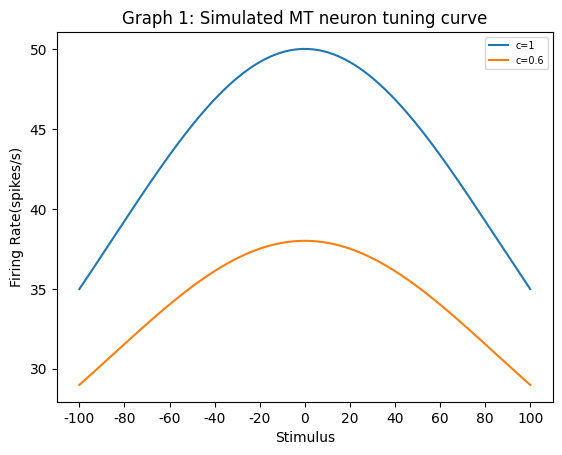

In [18]:
fig, ax = plt.subplots(1, 1)
ax.set_title('Graph 1: Simulated MT neuron tuning curve')
ax.set_xlabel('Stimulus')
ax.set_ylabel('Firing Rate(spikes/s)')
ax.plot(r(t1), label='c=1')
ax.plot(r(t1, c=0.6), label='c=0.6')
ax.set_xticks(np.arange(2*100*(1/r_precision) + 2*10*(1/r_precision), 
                              step = 2*10*(1/r_precision)), np.arange(start = -100, stop = 120, step = 20))
ax.legend(fontsize = 'x-small')
plt.draw()


Now that we've seen how the theoretical simulation looks like, we want to plot the random trials generated with the poisson function
We also are going to want to see the **threshold** that defines the angle that distinguishes a neuron from another, we expect a thershold standing in the middle of the two distributions
Having calculated the threshold also may want to calculate the **precision** of the threshold, as the coherence was $c = 1$ we expect to have a relatively high precision

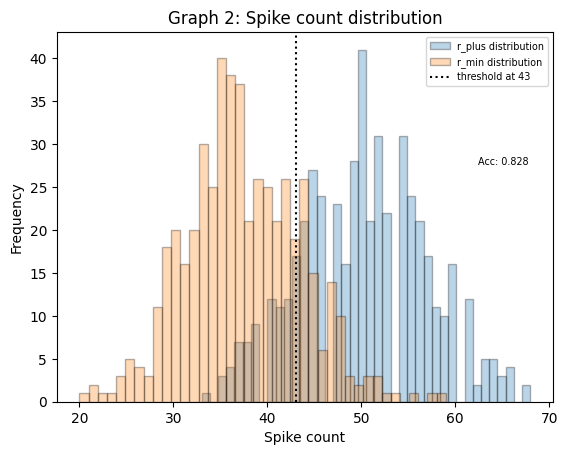

In [19]:
fig, ax = plt.subplots(1, 1)
#simulating spikes count distribution 
kwargs = dict(alpha=0.3, bins=40, ec="k")
ax.hist(r_plus, **kwargs, label='r_plus distribution')
ax.hist(r_min, **kwargs, label='r_min distribution')
ax.set_title('Graph 2: Spike count distribution')
ax.set_xlabel('Spike count')
ax.set_ylabel('Frequency')

#calculating optimal threshold and proportion of correct predictions of the threshold 
r_threshold = statistics.mean([statistics.mean(r_plus), statistics.mean(r_min)])
ax.axvline(x=r_threshold, label='threshold at {}'.format(r_threshold), c='k', ls=':')
ax.legend(fontsize = 'x-small')
def rProp():
    counter = 0
    for pp in r_plus:
        if pp >= r_threshold:
            counter+=1
    for mm in r_min:
        if mm < r_threshold:
            counter+=1
    r_min0 = r_min
    r_min0[r_min0 < r_threshold] = 1
    return counter/(n_trials*2)
toSay = 'Acc: ' + str(rProp())
ax.text(0.9,0.65,toSay,horizontalalignment='center', fontsize = 'x-small',
     verticalalignment='center', transform = ax.transAxes);

The next thing we want to see is what happens if we plot the same trials but in this case with coherence $c = 0$  
We should see how as with $c = 1$ the **threshold** stays in the middle of the two distributions but in this case, the precision obtained with the new threshold should decrease considerably, and should approach $0.5$, due the lack ok coherence

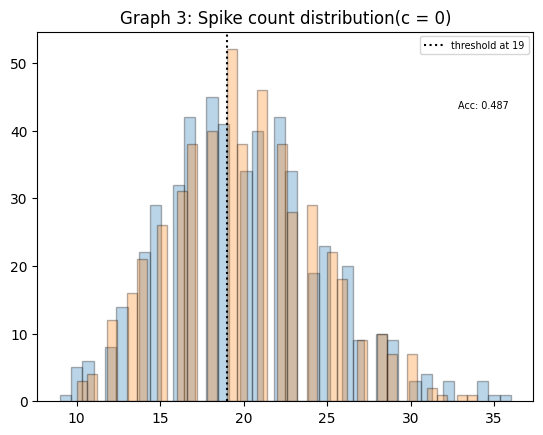

In [20]:
fig, ax = plt.subplots(1, 1)
#calculating again with coherence = 0
r_plus = np.random.poisson(r(0, c=0), n_trials)
r_min  = np.random.poisson(r(90,c=0), n_trials)
r_threshold = statistics.mean([statistics.mean(r_plus), statistics.mean(r_min)])
kwargs = dict(alpha=0.3, bins=40, ec="k")
ax.hist(r_plus, **kwargs)
ax.hist(r_min, **kwargs)
ax.axvline(x=r_threshold, label='threshold at {}'.format(r_threshold), c='k', ls=':')
ax.legend(fontsize = 'x-small')
toSay = 'Acc: ' + str(rProp())
ax.text(0.9,0.8,toSay,horizontalalignment='center', fontsize = 'x-small',
     verticalalignment='center', transform = ax.transAxes)
ax.set_title('Graph 3: Spike count distribution(c = 0)');

Finally we want to see the exact relation between coherence and precision, to do that, we'll just apply the trials with a changing coherence, and we should end up seeing how the precision increases as the coherence gets higher

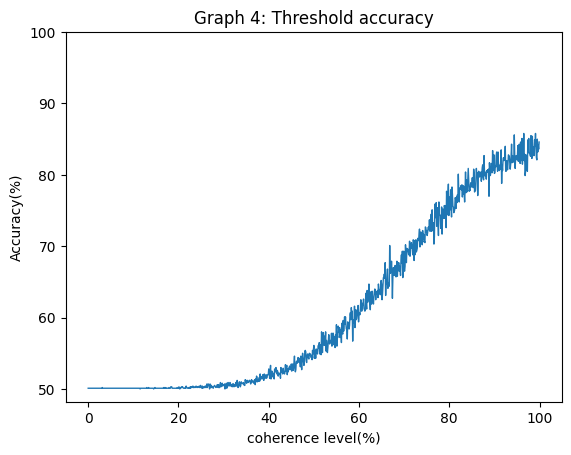

In [21]:
fig, ax = plt.subplots(1, 1)
#calculating proportion of correct predictions of the threshold varying c
r_plus = np.random.poisson(r(0, c=1), n_trials)
r_min  = np.random.poisson(r(90,c=1), n_trials)
r_threshold = statistics.mean([statistics.mean(r_plus), statistics.mean(r_min)])
precision2 = 0.001
def r2(c3):
    it = 0
    
    counter2 = [0]*int((1/precision2))
    for ca in c3:
        r2_plus = np.random.poisson(r(0, c=ca), n_trials)
        r2_min  = np.random.poisson(r(90,c=ca), n_trials) 
        for pp in r2_plus:
            if pp >= r_threshold:
                counter2[it]+=1
        for mm in r2_min:
            if mm < r_threshold:
                counter2[it]+=1
        counter2[it]/=(n_trials*2)
        it+=1
    return counter2

ax.plot(r2(np.arange(0,1, step = precision2)), linewidth = 1)
ax.set_xticks(np.arange(12*(0.1/precision2), step = 2*(0.1/precision2)), np.arange(120, step = 20))
ax.set_yticks(np.arange(0.499, 1.099, 0.1), np.arange(50, 110, 10))
ax.set_title('Graph 4: Threshold accuracy')
ax.set_ylabel('Accuracy(%)')
ax.set_xlabel('coherence level(%)')


plt.subplots_adjust(hspace = 0.5)
plt.subplots_adjust(wspace = 0.25)
plt.show()
